# TCD - Análise de dados em Astronomia
## Arthur S. Magalhães - 12629595


### 1. Descontaminação da amostra

In [2]:
## Primeiramente vamos ler o arquivo com os dados de cross-match do filtro Brg da Spartan com o catálogo 2mass

brg_spartan <- read.table('cm_brg_2mass.txt', header = T) ## 189 fontes 

cont3_spartan <- read.table('cm_cont3_2mass.txt', header = T) ## 197 fontes

h2_spartan <- read.table('cm_h2_2mass.txt', header = T) ## 195 fontes

#nrow(brg_spartan)

#brg_spartan
#cont3_spartan
#h2_spartan

In [3]:
## Vamos fazer uma funcao para adicionar uma coluna de index nos nossos dados, que irá nos ajudar futuramente

index_function <- function(df){
    index = c(1:nrow(df))
    df = cbind(index,df)
    return(df)
}


brg_spartan = index_function(brg_spartan)
cont3_spartan = index_function(cont3_spartan)
h2_spartan = index_function(h2_spartan)

#cont3_spartan

In [4]:
 # Agora vamos  fazer um loop para eliminar aquelas fontes com qualidade ruim no filtro K do 2MASS

qflag_brg = brg_spartan[,c('Qflg')]
qflag_cont3 = cont3_spartan[,c('Qflg')]
qflag_h2 = h2_spartan[,c('Qflg')]

descont_function <- function(qflag, df){
    cont = 0
    for (item in qflag){
        if(substr(item, 3, 3) == "A"){
            cont = cont+1
        }
        if (substr(item, 3, 3) != "A"){
            cont = cont+1        
            df = df[df$index != cont,]
        }
    }
    return(df)
}

brg_descont = descont_function(qflag_brg,brg_spartan) ## 109 fontes
cont3_descont = descont_function(qflag_cont3,cont3_spartan) ## 109 fontes
h2_descont = descont_function(qflag_h2,h2_spartan) ## 110 fontes


#brg_descont
#cont3_descont
#h2_descont

### 2. Obtendo magnitudes instrumentais

In [61]:
## Agora vamos fazer uam funcao para transformar os fluxos em magnitudes instrumentais

magnitude_function <- function(df){
    mag_instr = -2.5*log10(df$flux)
    df = cbind(df, mag_instr)
    return(df)
}

## Todas as fontes
brg_spartan = magnitude_function(brg_spartan)
cont3_spartan = magnitude_function(cont3_spartan)
h2_spartan = magnitude_function(h2_spartan)

## Fontes Descontaminadas
brg_descont = magnitude_function(brg_descont)
cont3_descont = magnitude_function(cont3_descont)
h2_descont = magnitude_function(h2_descont)

### 3. Calibração dos fluxos

corrplot 0.92 loaded



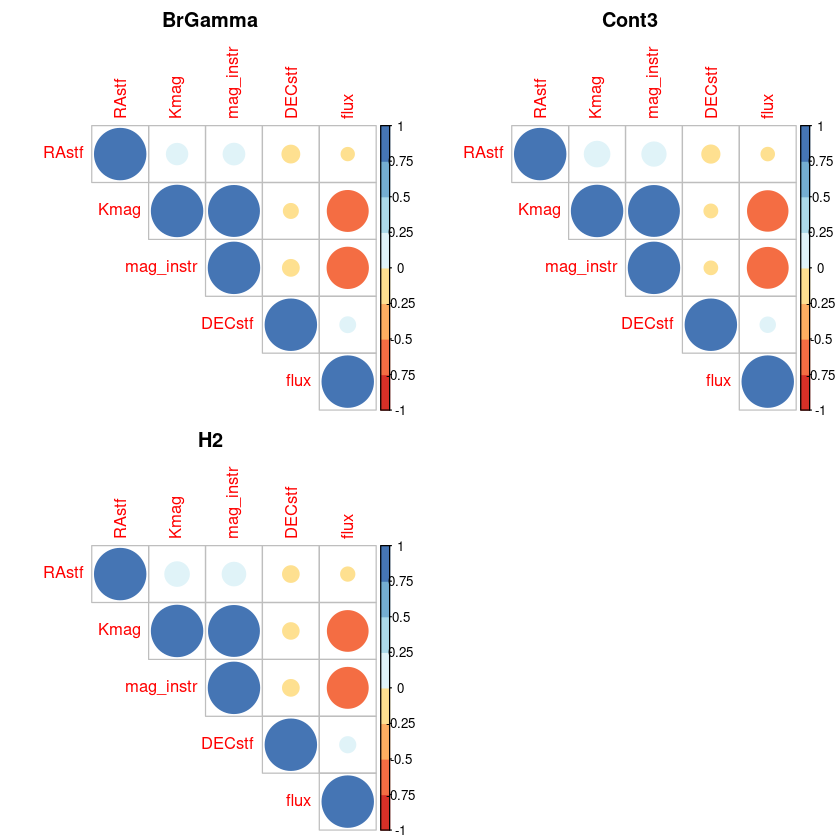

In [6]:
## Primeiramente vamos fazer graficos de correlacao para checar a linearidade
## do ajuste que sera feito entre mag_instr e Kmag

library(corrplot)
library(RColorBrewer)

par(mfrow = c(2,2))
M <-cor(brg_spartan[c(2:4,22,70)],method = 'pearson')
corrplot(M,order="hclust",type = 'upper',main = 'BrGamma',
 col=brewer.pal(n=8, name="RdYlBu"),mar=c(0,0,2,0))

M2 <-cor(cont3_spartan[c(2:4,22,70)],method = 'pearson')
corrplot(M2,order="hclust",type = 'upper',main = 'Cont3',
 col=brewer.pal(n=8, name="RdYlBu"),mar=c(0,0,2,0))

M3 <-cor(h2_spartan[c(2:4,22,70)],method = 'pearson')
corrplot(M3,order="hclust",type = 'upper',main = 'H2',
 col=brewer.pal(n=8, name="RdYlBu"),mar=c(0,0,2,0))

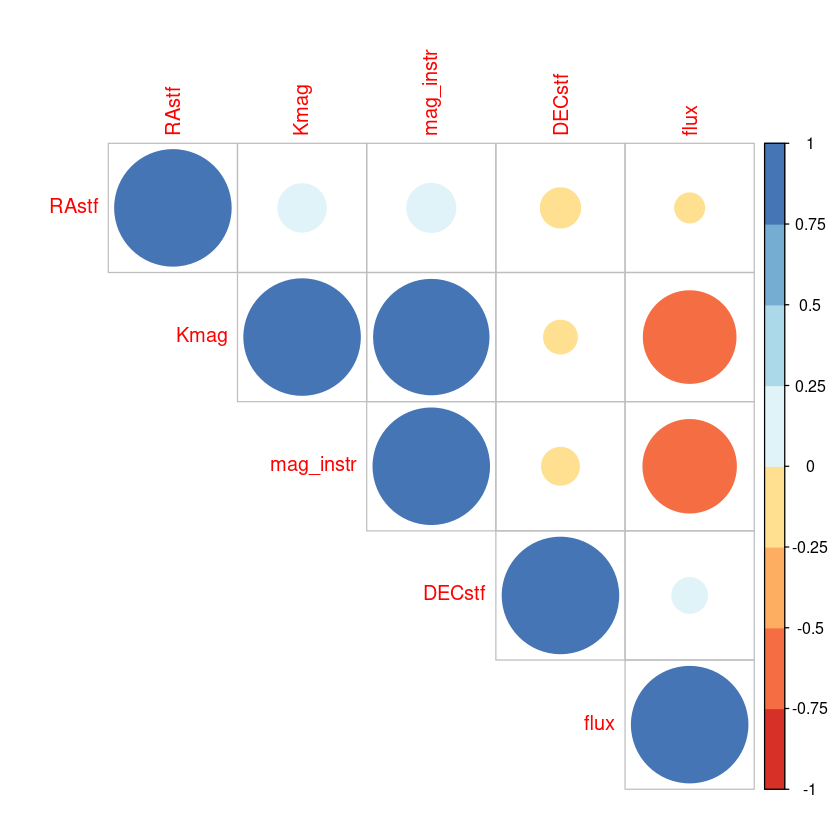

In [7]:
#par(mfrow = c(2,2))
M <-cor(brg_spartan[c(2:4,22,70)],method = 'pearson')
corrplot(M,order="hclust",type = 'upper',
 col=brewer.pal(n=8, name="RdYlBu"))

#### 3.0 Verificando a correlacao graficamente

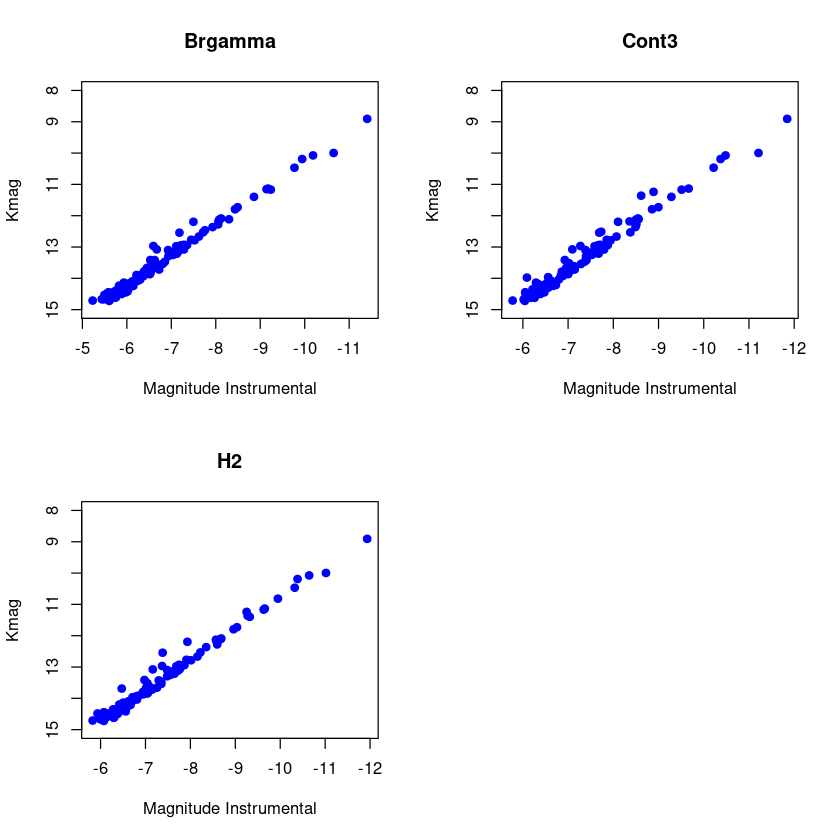

In [17]:
par(mfrow=c(2,2))
plot(brg_descont$mag_instr,brg_descont$Kmag,ylim = rev(c(8,15)),xlim = rev(range(brg_descont$mag_instr)),col = 'blue', pch = 19, main = 'Brgamma', xlab = 'Magnitude Instrumental', ylab = 'Kmag')
plot(cont3_descont$mag_instr,cont3_descont$Kmag,ylim = rev(c(8,15)),xlim = rev(range(cont3_descont$mag_instr)),col = 'blue', pch = 19, main = 'Cont3', xlab = 'Magnitude Instrumental', ylab = 'Kmag')
plot(h2_descont$mag_instr,h2_descont$Kmag,ylim = rev(c(8,15)),xlim = rev(range(h2_descont$mag_instr)),col = 'blue', pch = 19, main = 'H2', xlab = 'Magnitude Instrumental', ylab = 'Kmag')

#### 3.1 Todas Fontes

In [19]:
M_brg = lm(brg_spartan$Kmag ~ brg_spartan$mag_instr)
M_cont3 = lm(cont3_spartan$Kmag ~ cont3_spartan$mag_instr)
M_h2 = lm(h2_spartan$Kmag ~ h2_spartan$mag_instr)

w_brg = M_brg$coefficients
w_cont3 = M_cont3$coefficients
w_h2 = M_h2$coefficients

w_brg
w_cont3
w_h2

#summary(M_brg)
#summary(M_cont3)
#summary(M_h2)

(Intercept) brg_spartan$mag_instr 
           19.9862596             0.9652374

(Intercept) cont3_spartan$mag_instr 
             20.4576178               0.9698813

(Intercept) h2_spartan$mag_instr 
          20.4238276            0.9603875

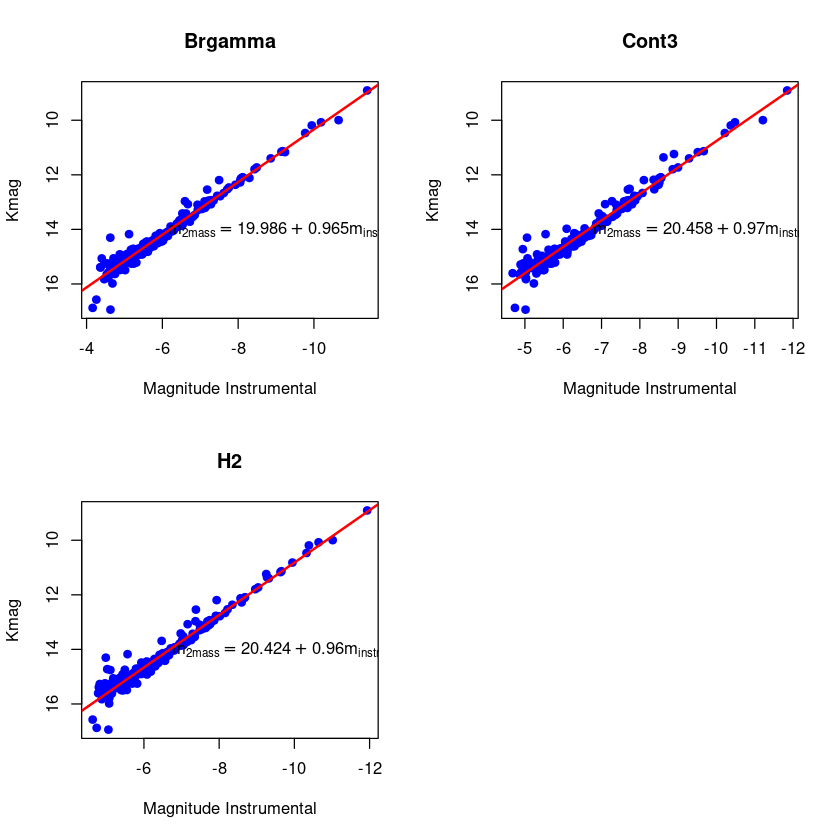

In [24]:
par(mfrow = c(2,2))

library(latex2exp)
plot(brg_spartan$mag_instr,brg_spartan$Kmag,ylim = rev(range(brg_spartan$Kmag)),xlim = rev(range(brg_spartan$mag_instr)),col = 'blue', pch = 19, main = 'Brgamma', xlab = 'Magnitude Instrumental', ylab = 'Kmag')
text(-9, 14,TeX(r'($m_{2mass} = 19.986 + 0.965 m_{instr} $)'))
abline(M_brg,col = 'red' , lw = 2)

plot(cont3_spartan$mag_instr,cont3_spartan$Kmag,ylim = rev(range(cont3_spartan$Kmag)),xlim = rev(range(cont3_spartan$mag_instr)),col = 'blue', pch = 19, main = 'Cont3', xlab = 'Magnitude Instrumental', ylab = 'Kmag')
text(-9.5, 14,TeX(r'($m_{2mass} = 20.458 + 0.970 m_{instr} $)'))
abline(M_cont3,col = 'red' , lw = 2)

plot(h2_spartan$mag_instr,h2_spartan$Kmag,ylim = rev(range(h2_spartan$Kmag)),xlim = rev(range(h2_spartan$mag_instr)),col = 'blue', pch = 19, main = 'H2', xlab = 'Magnitude Instrumental', ylab = 'Kmag')
text(-9.5, 14,TeX(r'($m_{2mass} = 20.424 + 0.960 m_{instr} $)'))
abline(M_h2,col = 'red' , lw = 2)

#### 3.2 Fontes descontaminadas

In [23]:
M_brg_descont = lm(brg_descont$Kmag ~ brg_descont$mag_instr)
M_cont3_descont = lm(cont3_descont$Kmag ~ cont3_descont$mag_instr)
M_h2_descont = lm(h2_descont$Kmag ~ h2_descont$mag_instr)

w_brg_descont = M_brg_descont$coefficients
w_cont3_descont = M_cont3_descont$coefficients
w_h2_descont = M_h2_descont$coefficients

w_brg_descont
w_cont3_descont
w_h2_descont

#summary(M_brg_descont)
#summary(M_cont3_descont)
#summary(M_h2_descont)

(Intercept) brg_descont$mag_instr 
           20.0625090             0.9760292

(Intercept) cont3_descont$mag_instr 
              20.705236                1.002568

(Intercept) h2_descont$mag_instr 
          20.6151655            0.9853806

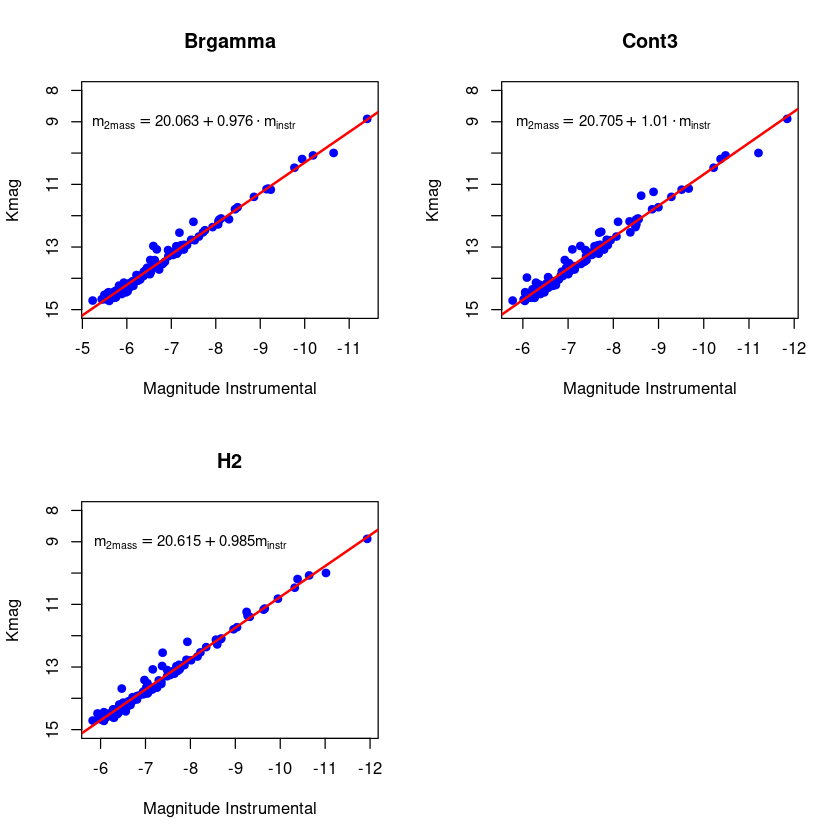

In [36]:
par(mfrow = c(2,2))

library(latex2exp)

plot(brg_descont$mag_instr,brg_descont$Kmag,ylim = rev(c(8,15)),xlim = rev(range(brg_descont$mag_instr)),col = 'blue', pch = 19, main = 'Brgamma', xlab = 'Magnitude Instrumental', ylab = 'Kmag')
text(-7.5, 9,TeX(r'($m_{2mass} = 20.063 + 0.976 \cdot m_{instr} $)'), cex = 0.9)
abline(M_brg_descont,col = 'red', lw = 2)

plot(cont3_descont$mag_instr,cont3_descont$Kmag,ylim = rev(c(8,15)),xlim = rev(range(cont3_descont$mag_instr)),col = 'blue', pch = 19, main = 'Cont3', xlab = 'Magnitude Instrumental', ylab = 'Kmag')
text(-8,9,TeX(r'($m_{2mass} = 20.705 + 1.01 \cdot m_{instr} $)'), cex = 0.9)
abline(M_cont3_descont,col = 'red' , lw = 2)

plot(h2_descont$mag_instr,h2_descont$Kmag,ylim = rev(c(8,15)),xlim = rev(range(h2_descont$mag_instr)),col = 'blue', pch = 19, main = 'H2', xlab = 'Magnitude Instrumental', ylab = 'Kmag')
text(-8, 9,TeX(r'($m_{2mass} = 20.615 + 0.985 m_{instr} $)'), cex = 0.9)
abline(M_h2_descont,col = 'red' , lw = 2)

### 4. Determinação de erros com Bootstrap 

In [42]:
set.seed(123)



bootstrap <- function(df){
nboot = 10000
a = rep(0,nboot)
b = rep(0,nboot)

ind = seq(1,length(df$mag_instr),1)

for (i in 1:nboot){
    
    novoind=sample(ind,length(df$mag_instr), replace = TRUE)
    
    sminstr=df$mag_instr[novoind]
    skmag=df$Kmag[novoind]
    
    a[i]=lm(skmag~sminstr)$coefficients[1]
    b[i]=lm(skmag~sminstr)$coefficients[2]
    
 }
    l_par = list(a,b)
}



In [43]:
par_brg = bootstrap(brg_descont)
par_cont3 = bootstrap(cont3_descont)
par_h2 = bootstrap(h2_descont)

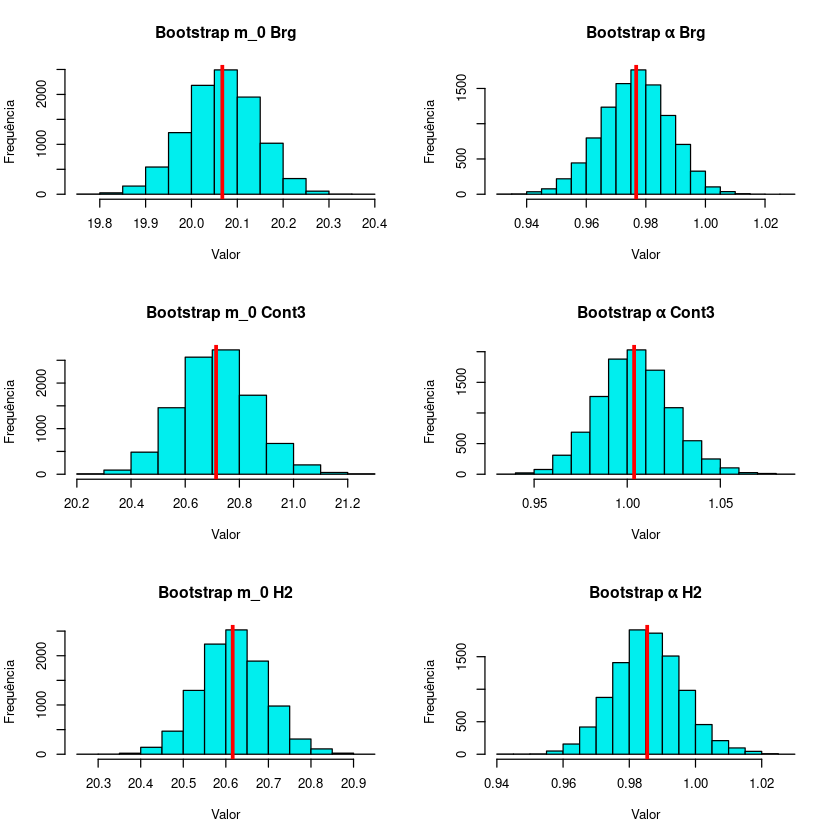

In [44]:
## visualização dos resultados da simulação:

a_brg <- unlist(par_brg[1], use.names = FALSE)
b_brg <- unlist(par_brg[2], use.names = FALSE)

a_cont3 <- unlist(par_cont3[1], use.names = FALSE)
b_cont3 <- unlist(par_cont3[2], use.names = FALSE)

a_h2 <- unlist(par_h2[1], use.names = FALSE)
b_h2 <- unlist(par_h2[2], use.names = FALSE)

## Ainda tenho que usar metodos para encontrar a melhor quantidade de bins !!

par(mfrow = c(3,2))

hist(a_brg,col='cyan2',ylab='Frequência',xlab = 'Valor',main='Bootstrap m_0 Brg')
abline(v=median(a_brg),lwd=3, col = 'red')

hist(b_brg,col='cyan2',ylab='Frequência',xlab = 'Valor',main='Bootstrap α Brg')
abline(v=median(b_brg),lwd=3, col = 'red')

hist(a_cont3,col='cyan2',ylab='Frequência',xlab = 'Valor',main='Bootstrap m_0 Cont3')
abline(v=median(a_cont3),lwd=3, col = 'red')

hist(b_cont3,col='cyan2',ylab='Frequência',xlab = 'Valor',main='Bootstrap α Cont3')
abline(v=median(b_cont3),lwd=3, col = 'red')

hist(a_h2,col='cyan2',ylab='Frequência',xlab = 'Valor',main='Bootstrap m_0 H2')
abline(v=median(a_h2),lwd=3, col = 'red')

hist(b_h2,col='cyan2',ylab='Frequência',xlab = 'Valor',main='Bootstrap α H2')
abline(v=median(b_h2),lwd=3, col = 'red')

In [45]:
## Agora vamos determinar os erros a partir dos valores simulados

#summary(a_brg)
erro_a_brg = sd(a_brg)
#erro_a_brg

#summary(b_brg)
erro_b_brg = sd(b_brg)
#erro_b_brg

#summary(a_cont3)
erro_a_cont3 = sd(a_cont3)
#erro_a_cont3

#summary(b_cont3)
erro_b_cont3 = sd(b_cont3)
#erro_b_cont3

#summary(a_h2)
erro_a_h2 = sd(a_h2)
#erro_a_h2

#summary(b_h2)
erro_b_h2 = sd(b_h2)
#erro_b_h2

cat('Erros: \n σa_brg =', erro_a_brg , ' ; σb_brg =', erro_b_brg , '\n σa_cont3 =',erro_a_cont3,' ; σb_cont3 =', erro_b_cont3 , '\n σa_h2 =', erro_a_h2, '; σb_h2=', erro_b_h2)


Erros: 
 σa_brg = 0.07804613  ; σb_brg = 0.01142133 
 σa_cont3 = 0.1401653  ; σb_cont3 = 0.01984761 
 σa_h2 = 0.07835118 ; σb_h2= 0.01041986

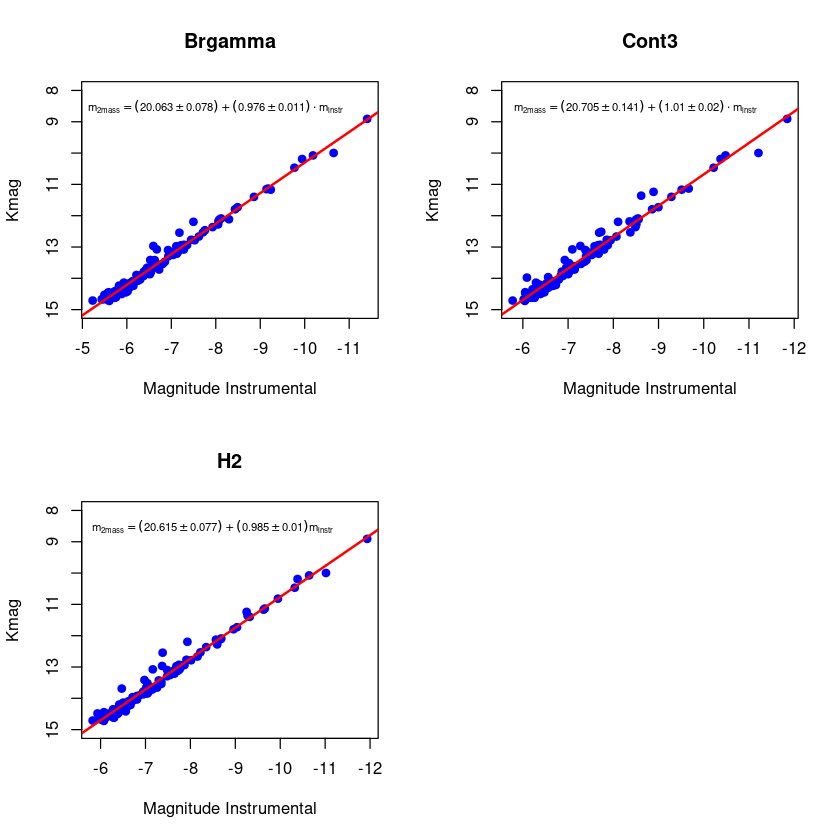

In [55]:
par(mfrow = c(2,2))

plot(brg_descont$mag_instr,brg_descont$Kmag,ylim = rev(c(8,15)),xlim = rev(range(brg_descont$mag_instr)),col = 'blue', pch = 19, main = 'Brgamma', xlab = 'Magnitude Instrumental', ylab = 'Kmag')
text(-8.0, 8.5,TeX(r'($m_{2mass} = (20.063\pm 0.078) + (0.976\pm 0.011) \cdot m_{instr} $)'), cex = 0.68)
abline(M_brg_descont,col = 'red', lw = 2)

plot(cont3_descont$mag_instr,cont3_descont$Kmag,ylim = rev(c(8,15)),xlim = rev(range(cont3_descont$mag_instr)),col = 'blue', pch = 19, main = 'Cont3', xlab = 'Magnitude Instrumental', ylab = 'Kmag')
text(-8.5, 8.5,TeX(r'($m_{2mass} = (20.705 \pm 0.141) + (1.01\pm 0.02) \cdot m_{instr} $)'), cex = 0.68)
abline(M_cont3_descont,col = 'red' , lw = 2)

plot(h2_descont$mag_instr,h2_descont$Kmag,ylim = rev(c(8,15)),xlim = rev(range(h2_descont$mag_instr)),col = 'blue', pch = 19, main = 'H2', xlab = 'Magnitude Instrumental', ylab = 'Kmag')
text(-8.5, 8.5,TeX(r'($m_{2mass} = (20.615\pm 0.077) + (0.985 \pm 0.010) m_{instr} $)'), cex = 0.68)
abline(M_h2_descont,col = 'red' , lw = 2)

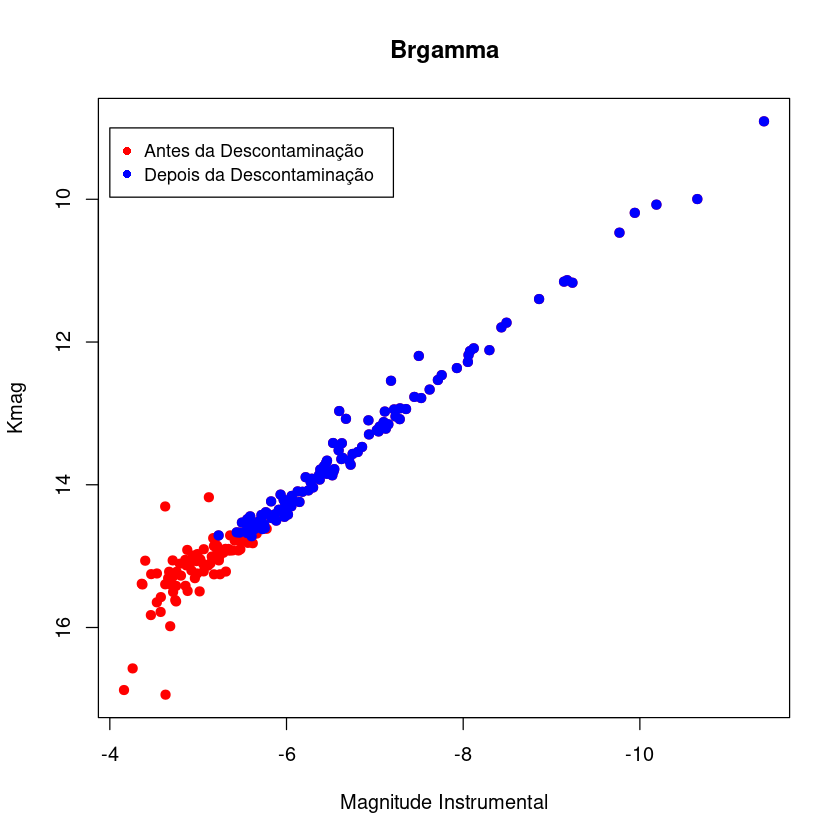

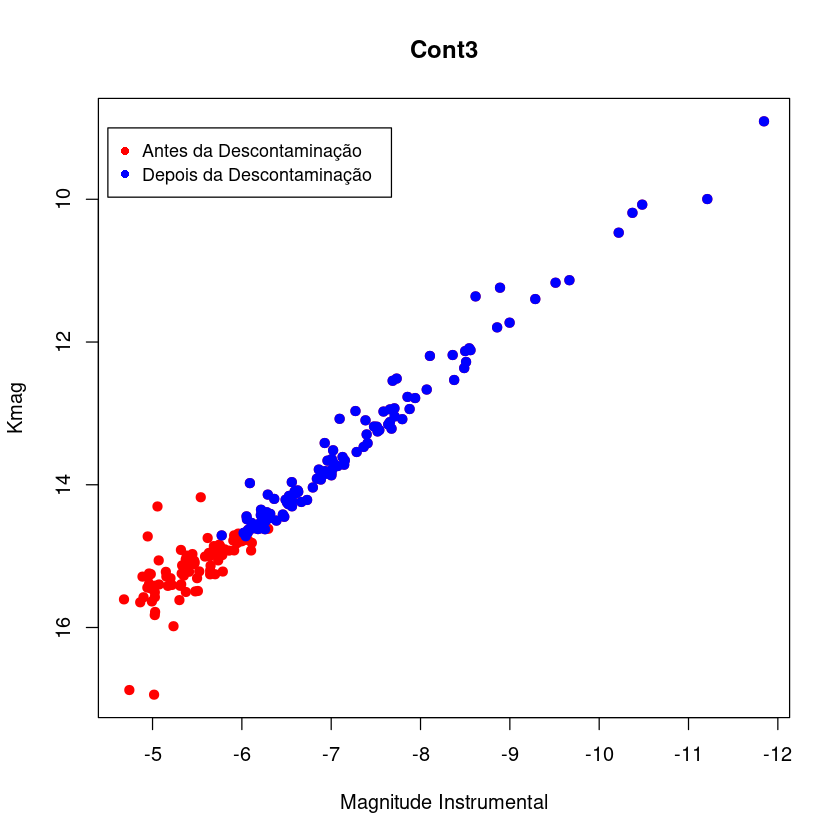

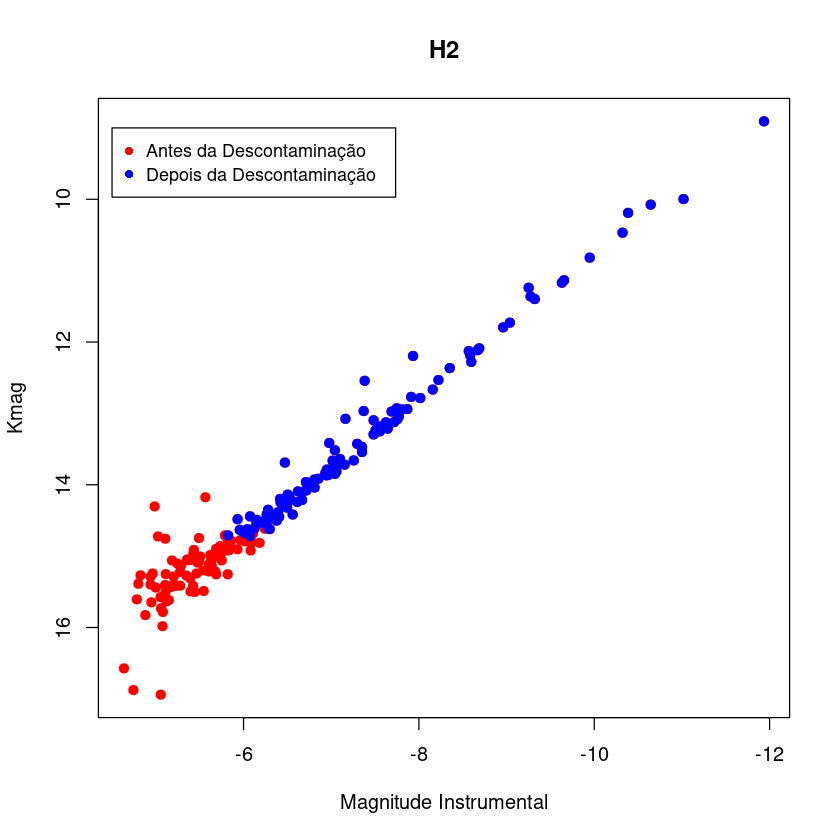

In [57]:
plot(brg_spartan$mag_instr,brg_spartan$Kmag,ylim = rev(range(brg_spartan$Kmag)),xlim = rev(range(brg_spartan$mag_instr)),col = 'red', pch = 19, main = 'Brgamma', xlab = 'Magnitude Instrumental', ylab = 'Kmag')
points(brg_descont$mag_instr, brg_descont$Kmag, pch = 19, col ='blue')
legend(-4, 9, legend=c("Antes da Descontaminação", "Depois da Descontaminação"),
       col=c("red", "blue"), pch=16, cex = 0.9)

plot(cont3_spartan$mag_instr,cont3_spartan$Kmag,ylim = rev(range(cont3_spartan$Kmag)),xlim = rev(range(cont3_spartan$mag_instr)),col = 'red', pch = 19, main = 'Cont3', xlab = 'Magnitude Instrumental', ylab = 'Kmag')
points(cont3_descont$mag_instr, cont3_descont$Kmag, pch = 19, col ='blue')
legend(-4.5, 9, legend=c("Antes da Descontaminação", "Depois da Descontaminação"),
       col=c("red", "blue"), pch=16, cex = 0.9)

plot(h2_spartan$mag_instr,h2_spartan$Kmag,ylim = rev(range(h2_spartan$Kmag)),xlim = rev(range(h2_spartan$mag_instr)),col = 'red', pch = 19, main = 'H2', xlab = 'Magnitude Instrumental', ylab = 'Kmag')
points(h2_descont$mag_instr, h2_descont$Kmag, pch = 19, col ='blue')
legend(-4.5, 9, legend=c("Antes da Descontaminação", "Depois da Descontaminação"),
       col=c("red", "blue"), pch=16, cex = 0.9)

### 5. Comparação do dados

In [58]:
brg_all = read.table('brg_allspartan.txt', header = T) ## 246 fontes
cont3_all = read.table('cont3_allspartan.txt', header = T) ## 250 fontes
h2_all = read.table('h2_allspartan.txt', header = T) ## 264 fontes

## pegando a mag_instr do conjunto inteiro

brg_all = magnitude_function(brg_all) 
cont3_all = magnitude_function(cont3_all) 
h2_all = magnitude_function(h2_all) 

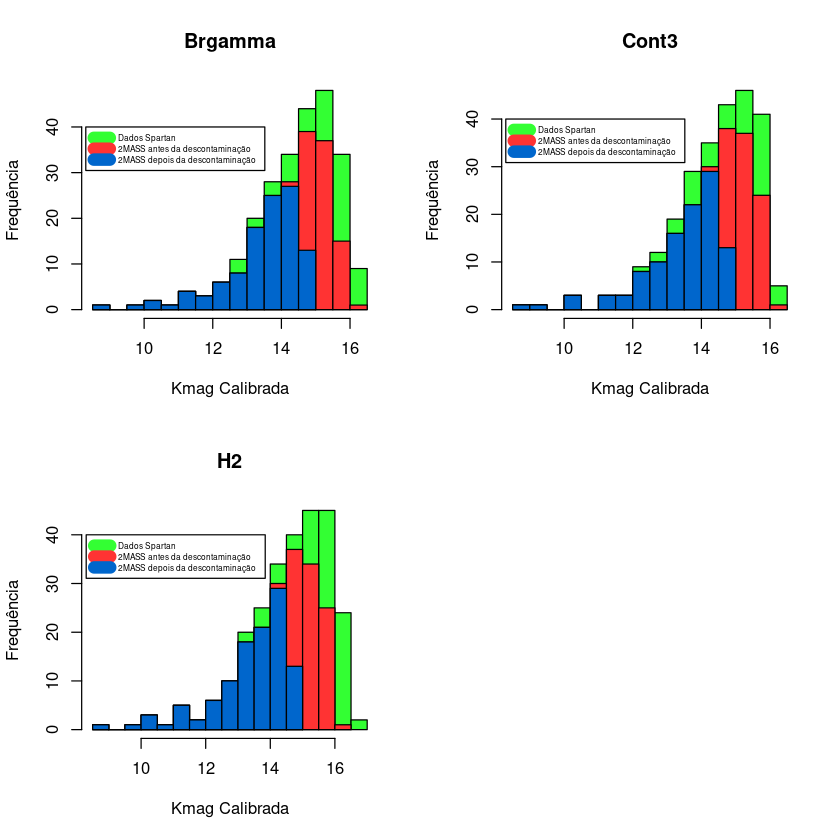

In [60]:
## Histograma para o Brgamma

par(mfrow=c(2,2))

brg_calib_all = brg_all$mag_instr*w_brg_descont[2] + w_brg_descont[1]
brg_calib_2mass = brg_spartan$mag_instr*w_brg_descont[2] + w_brg_descont[1]
brg_calib_descont = brg_descont$mag_instr*w_brg_descont[2] + w_brg_descont[1]

hist(brg_calib_all, col = '#33FF33', breaks = 15, main = 'Brgamma', xlab = 'Kmag Calibrada',ylab = 'Frequência')
hist(brg_calib_2mass, col = '#FF3333', breaks =  15,add = T)
hist(brg_calib_descont, col = '#0066CC', breaks = 15,add = T)

legend(8.3, 40, c("Dados Spartan", "2MASS antes da descontaminação", "2MASS depois da descontaminação"), col=c("#33FF33", "#FF3333", "#0066CC"), lwd=10, cex = 0.5)

## Histograma para o Cont3
cont3_calib_all = cont3_all$mag_instr*w_cont3_descont[2] + w_cont3_descont[1]
cont3_calib_2mass = cont3_spartan$mag_instr*w_cont3_descont[2] + w_cont3_descont[1]
cont3_calib_descont = cont3_descont$mag_instr*w_cont3_descont[2] + w_cont3_descont[1]

hist(cont3_calib_all, col = '#33FF33', breaks = 15, main = 'Cont3', xlab = 'Kmag Calibrada', ylab = 'Frequência')
hist(cont3_calib_2mass, col = '#FF3333', breaks =  15,add = T)
hist(cont3_calib_descont, col = '#0066CC', breaks = 15,add = T)

legend(8.3, 40, c("Dados Spartan", "2MASS antes da descontaminação", "2MASS depois da descontaminação"), col=c("#33FF33", "#FF3333", "#0066CC"), lwd=10, cex = 0.5)
## Histograma para o h2
h2_calib_all = h2_all$mag_instr*w_h2_descont[2] + w_h2_descont[1]
h2_calib_2mass = h2_spartan$mag_instr*w_h2_descont[2] + w_h2_descont[1]
h2_calib_descont = h2_descont$mag_instr*w_h2_descont[2] + w_h2_descont[1]

hist(h2_calib_all, col = '#33FF33', breaks = 15, main = 'H2', xlab = 'Kmag Calibrada', ylab = 'Frequência')
hist(h2_calib_2mass, col = '#FF3333', breaks =  15,add = T)
hist(h2_calib_descont, col = '#0066CC', breaks = 15,add = T)

legend(8.3, 40, c("Dados Spartan", "2MASS antes da descontaminação", "2MASS depois da descontaminação"), col=c("#33FF33", "#FF3333", "#0066CC"), lwd=10, cex = 0.5)

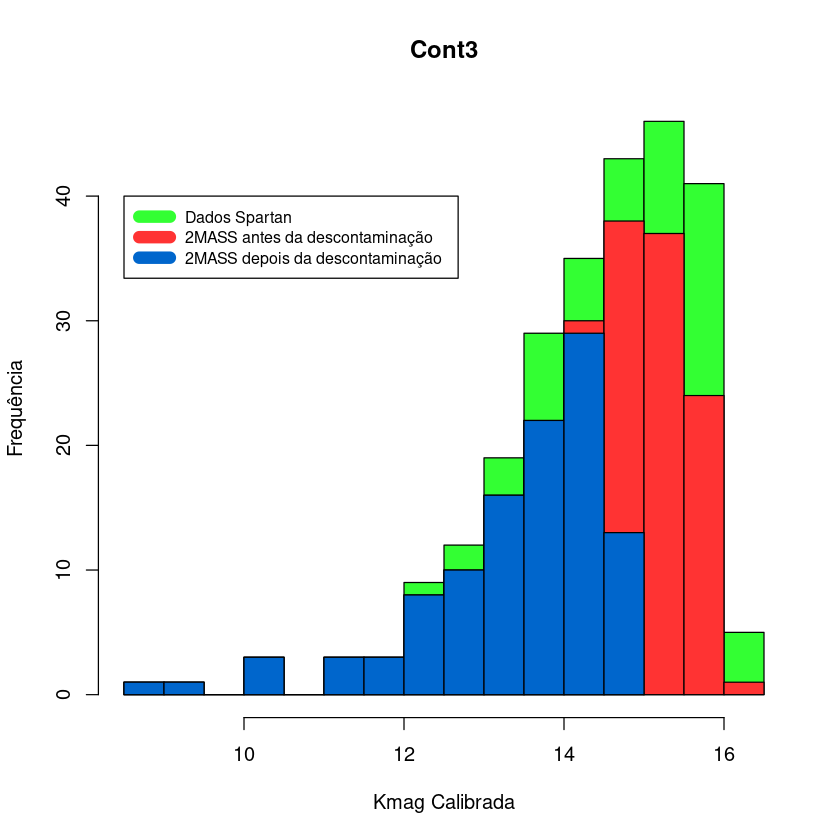

In [50]:
## Histograma para o Cont3
cont3_calib_all = cont3_all$mag_instr*w_cont3_descont[2] + w_cont3_descont[1]
cont3_calib_2mass = cont3_spartan$mag_instr*w_cont3_descont[2] + w_cont3_descont[1]
cont3_calib_descont = cont3_descont$mag_instr*w_cont3_descont[2] + w_cont3_descont[1]

hist(cont3_calib_all, col = '#33FF33', breaks = 15, main = 'Cont3', xlab = 'Kmag Calibrada', ylab = 'Frequência')
hist(cont3_calib_2mass, col = '#FF3333', breaks =  15,add = T)
hist(cont3_calib_descont, col = '#0066CC', breaks = 15,add = T)

legend(8.5, 40, c("Dados Spartan", "2MASS antes da descontaminação", "2MASS depois da descontaminação"), col=c("#33FF33", "#FF3333", "#0066CC"), lwd=10, cex = 0.8)

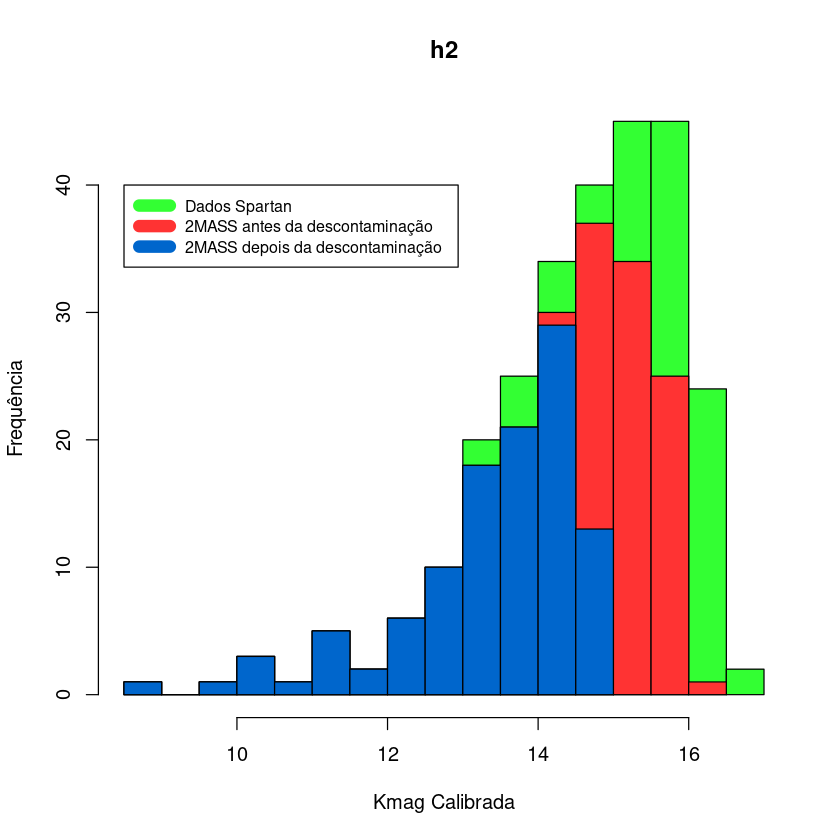

In [51]:
## Histograma para o h2
h2_calib_all = h2_all$mag_instr*w_h2_descont[2] + w_h2_descont[1]
h2_calib_2mass = h2_spartan$mag_instr*w_h2_descont[2] + w_h2_descont[1]
h2_calib_descont = h2_descont$mag_instr*w_h2_descont[2] + w_h2_descont[1]

hist(h2_calib_all, col = '#33FF33', breaks = 15, main = 'h2', xlab = 'Kmag Calibrada', ylab = 'Frequência')
hist(h2_calib_2mass, col = '#FF3333', breaks =  15,add = T)
hist(h2_calib_descont, col = '#0066CC', breaks = 15,add = T)

legend(8.5, 40, c("Dados Spartan", "2MASS antes da descontaminação", "2MASS depois da descontaminação"), col=c("#33FF33", "#FF3333", "#0066CC"), lwd=10, cex = 0.8)